In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.feature_selection import chi2
from get_feature_dictionary import get_feature_dictionary
from scipy.sparse import csr_matrix,load_npz,save_npz
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm



In [2]:
def get_path():
    NOTEBOOK_PATH=os.getcwd()
    PROJECT_ROOT=os.path.dirname(NOTEBOOK_PATH)
    return PROJECT_ROOT

In [3]:
PROJECT_ROOT=get_path()
OUTPUT_PATH_TRAIN=os.path.join(PROJECT_ROOT,"data","processed","train")
OUTPUT_PATH_TEST=os.path.join(PROJECT_ROOT,"data","processed","test")
OUTPUT_PATH_CV=os.path.join(PROJECT_ROOT,"data","processed","cv")
IMAGE_PATH=os.path.join(PROJECT_ROOT,"reports","figures")

In [4]:
feature_dictionary=get_feature_dictionary(PROJECT_ROOT)
feature_dictionary=np.array(feature_dictionary)


In [5]:
FILE_NAME="all_features_normalized.npz"
X=load_npz(os.path.join(OUTPUT_PATH_TRAIN,FILE_NAME))
# X=X.toarray()
y=pd.read_csv(os.path.join(OUTPUT_PATH_TRAIN,'y_train.csv'))

In [6]:
def get_feature_imp_values(X,y,pct):
    feature_importance=chi2(X,y)
    feature_importance=np.flip(np.argsort(feature_importance[1]))
    feat_size=len(feature_importance)
    first_features=int(feat_size*(pct/100))
    # selected_features=feature_dictionary[feature_importance][:first_features]
    x_train=X.toarray()
    x_train=np.take(x_train,feature_importance[:first_features],axis=1)
    return x_train,feature_importance[:first_features]

In [7]:
def tsne_viz(X,perp):
    xtsne=TSNE(perplexity=perp,n_jobs=-1)
    results=xtsne.fit_transform(X)
    vis_x = results[:, 0]
    vis_y = results[:, 1]
    return vis_x,vis_y


In [8]:
def feature_wise_importance(X,y,pct):
    FEAT_FILE_SIZE_POS=np.arange(2)
    FEAT_UNIGRAM_POS=np.arange(2,258)
    FEAT_BIGRAM_POS=np.arange(258,65794)
    FEAT_ASM_IMG_POS=np.arange(65794,66794)
    FEAT_UNIGRAM=X[:,FEAT_UNIGRAM_POS]
    FEAT_UNIGRAM,_=get_feature_imp_values(FEAT_UNIGRAM,y,pct)
    FEAT_BIGRAM=X[:,FEAT_BIGRAM_POS]
    FEAT_BIGRAM,_=get_feature_imp_values(FEAT_BIGRAM,y,pct)
    FEAT_ASM_IMG=X[:,FEAT_ASM_IMG_POS]
    FEAT_ASM_IMG,_=get_feature_imp_values(FEAT_ASM_IMG,y,pct)
    FILE_SIZES=X[:,FEAT_FILE_SIZE_POS].toarray()


    ALL=np.hstack((FILE_SIZES,FEAT_UNIGRAM,FEAT_BIGRAM,FEAT_ASM_IMG))
    return ALL

In [9]:
def bigram_feat_importance(X,y,pct):
    FEAT_FILE_SIZE_POS=np.arange(2)
    FEAT_UNIGRAM_POS=np.arange(2,258)
    FEAT_BIGRAM_POS=np.arange(258,65794)
    FEAT_ASM_IMG_POS=np.arange(65794,66794)
    FEAT_UNIGRAM=X[:,FEAT_UNIGRAM_POS].toarray()
    FEAT_ASM_IMG=X[:,FEAT_ASM_IMG_POS].toarray()
    FILE_SIZES=X[:,FEAT_FILE_SIZE_POS].toarray()

    FEAT_BIGRAM=X[:,FEAT_BIGRAM_POS]
    FEAT_BIGRAM,FEAT_BIGRAM_POS=get_feature_imp_values(FEAT_BIGRAM,y,pct)   
    FEAT_BIGRAM_POS+=258

    # feature_dictionary=get_feature_dictionary(PROJECT_ROOT)
    # feature_dictionary=np.array(feature_dictionary)
    reduced_feat_dict=np.hstack((FEAT_FILE_SIZE_POS,FEAT_UNIGRAM_POS,FEAT_BIGRAM_POS,FEAT_ASM_IMG_POS))
    # feature_dictionary=np.take(feature_dictionary,reduced_feat_dict)
    ALL=np.hstack((FILE_SIZES,FEAT_UNIGRAM,FEAT_BIGRAM,FEAT_ASM_IMG))
    return ALL,reduced_feat_dict

100%|██████████| 10/10 [08:28<00:00, 50.82s/it]


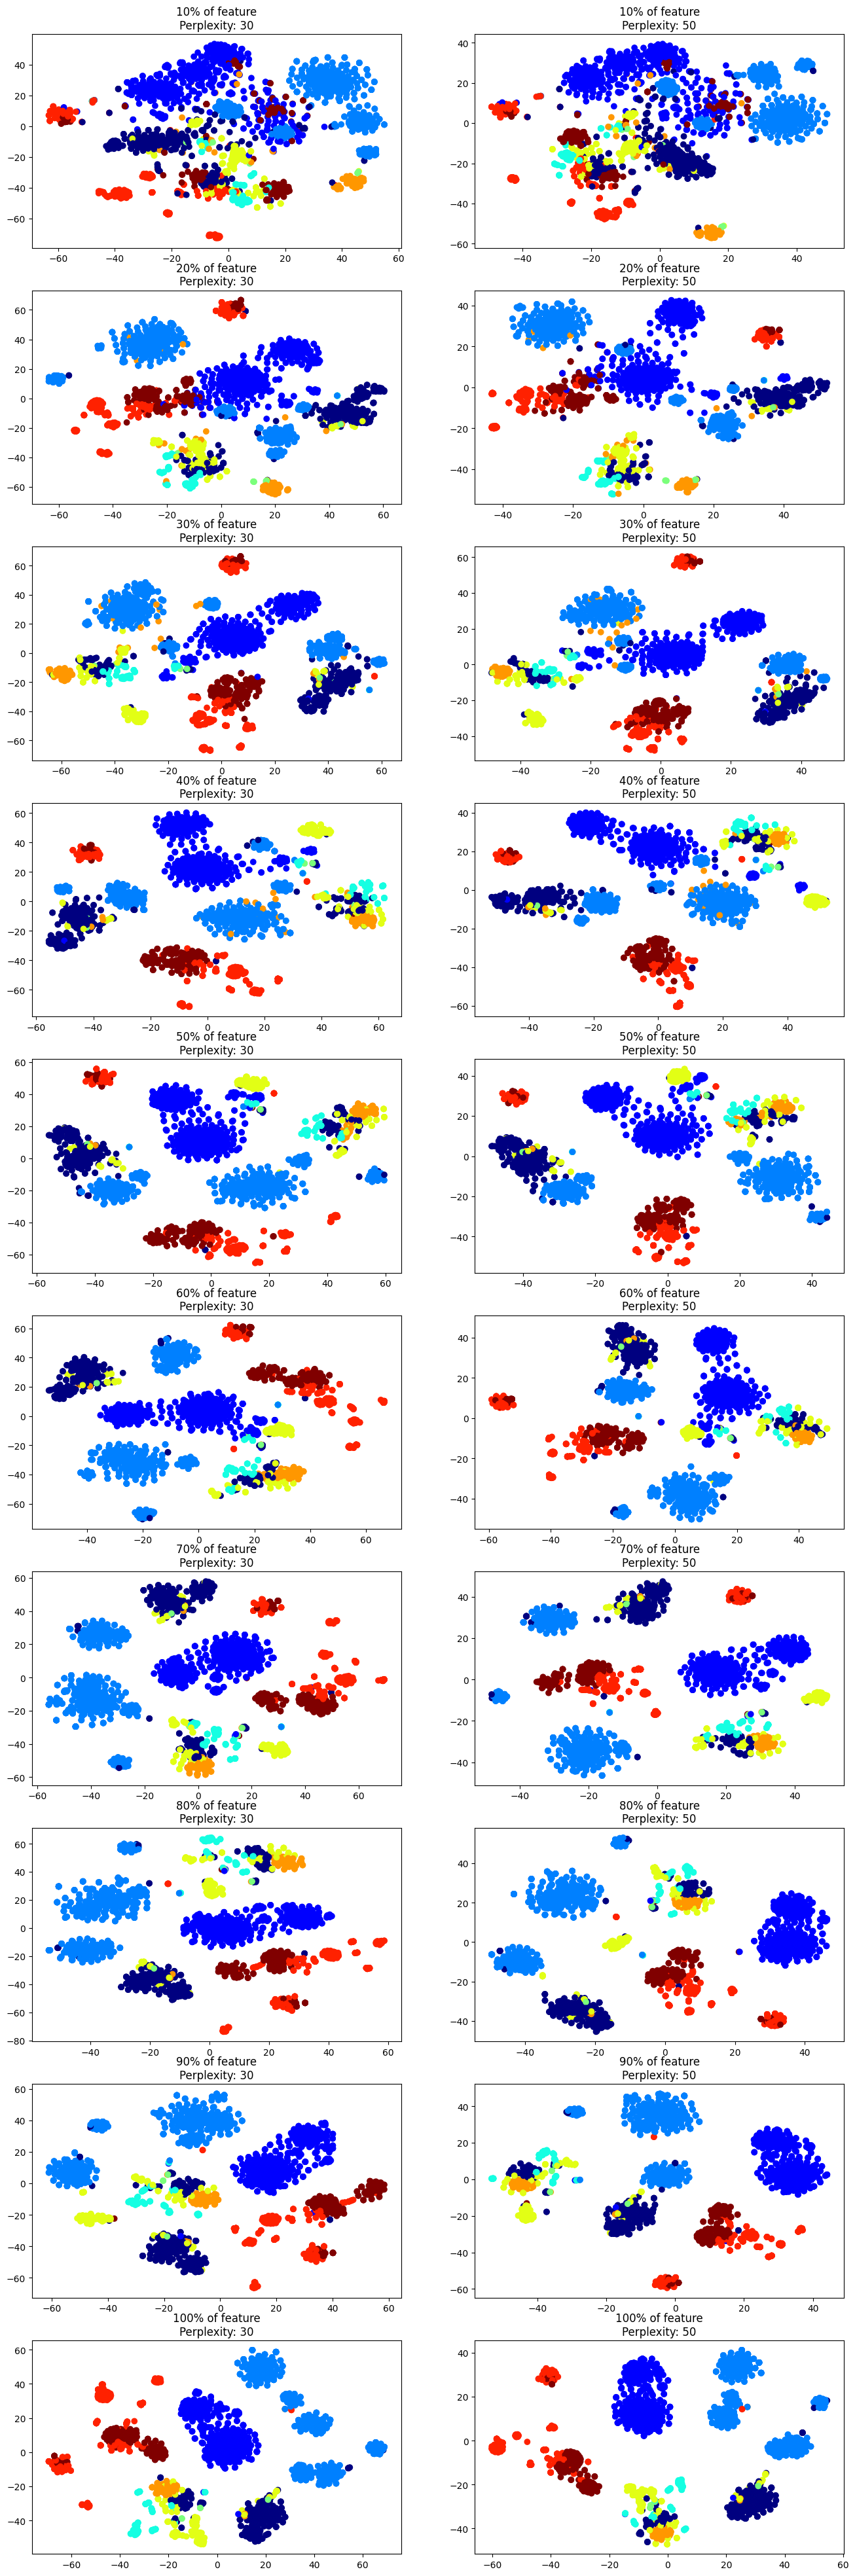

In [10]:
row=0
fig, axs = plt.subplots(10,2,figsize=(16,50))
for i in tqdm(range(10,101,10)):
    col=0
    x_train=feature_wise_importance(X,y,i)
    vis_x_perp_30,vis_yperp_30=tsne_viz(x_train,30)
    vis_x_perp_50,vis_yperp_50=tsne_viz(x_train,50)
    
    axs[row,col].scatter(vis_x_perp_30, vis_yperp_30, c=(y.values), cmap=plt.cm.get_cmap("jet", 9))
    axs[row,col].set_title(f"{i}% of feature\nPerplexity: 30")
    col+=1
    axs[row,col].scatter(vis_x_perp_50, vis_yperp_50, c=(y.values), cmap=plt.cm.get_cmap("jet", 9))
    axs[row,col].set_title(f"{i}% of feature\nPerplexity: 50")
    row+=1
plt.savefig(os.path.join(IMAGE_PATH,"TSNE_FEATURE_WISE.png"))
plt.show()

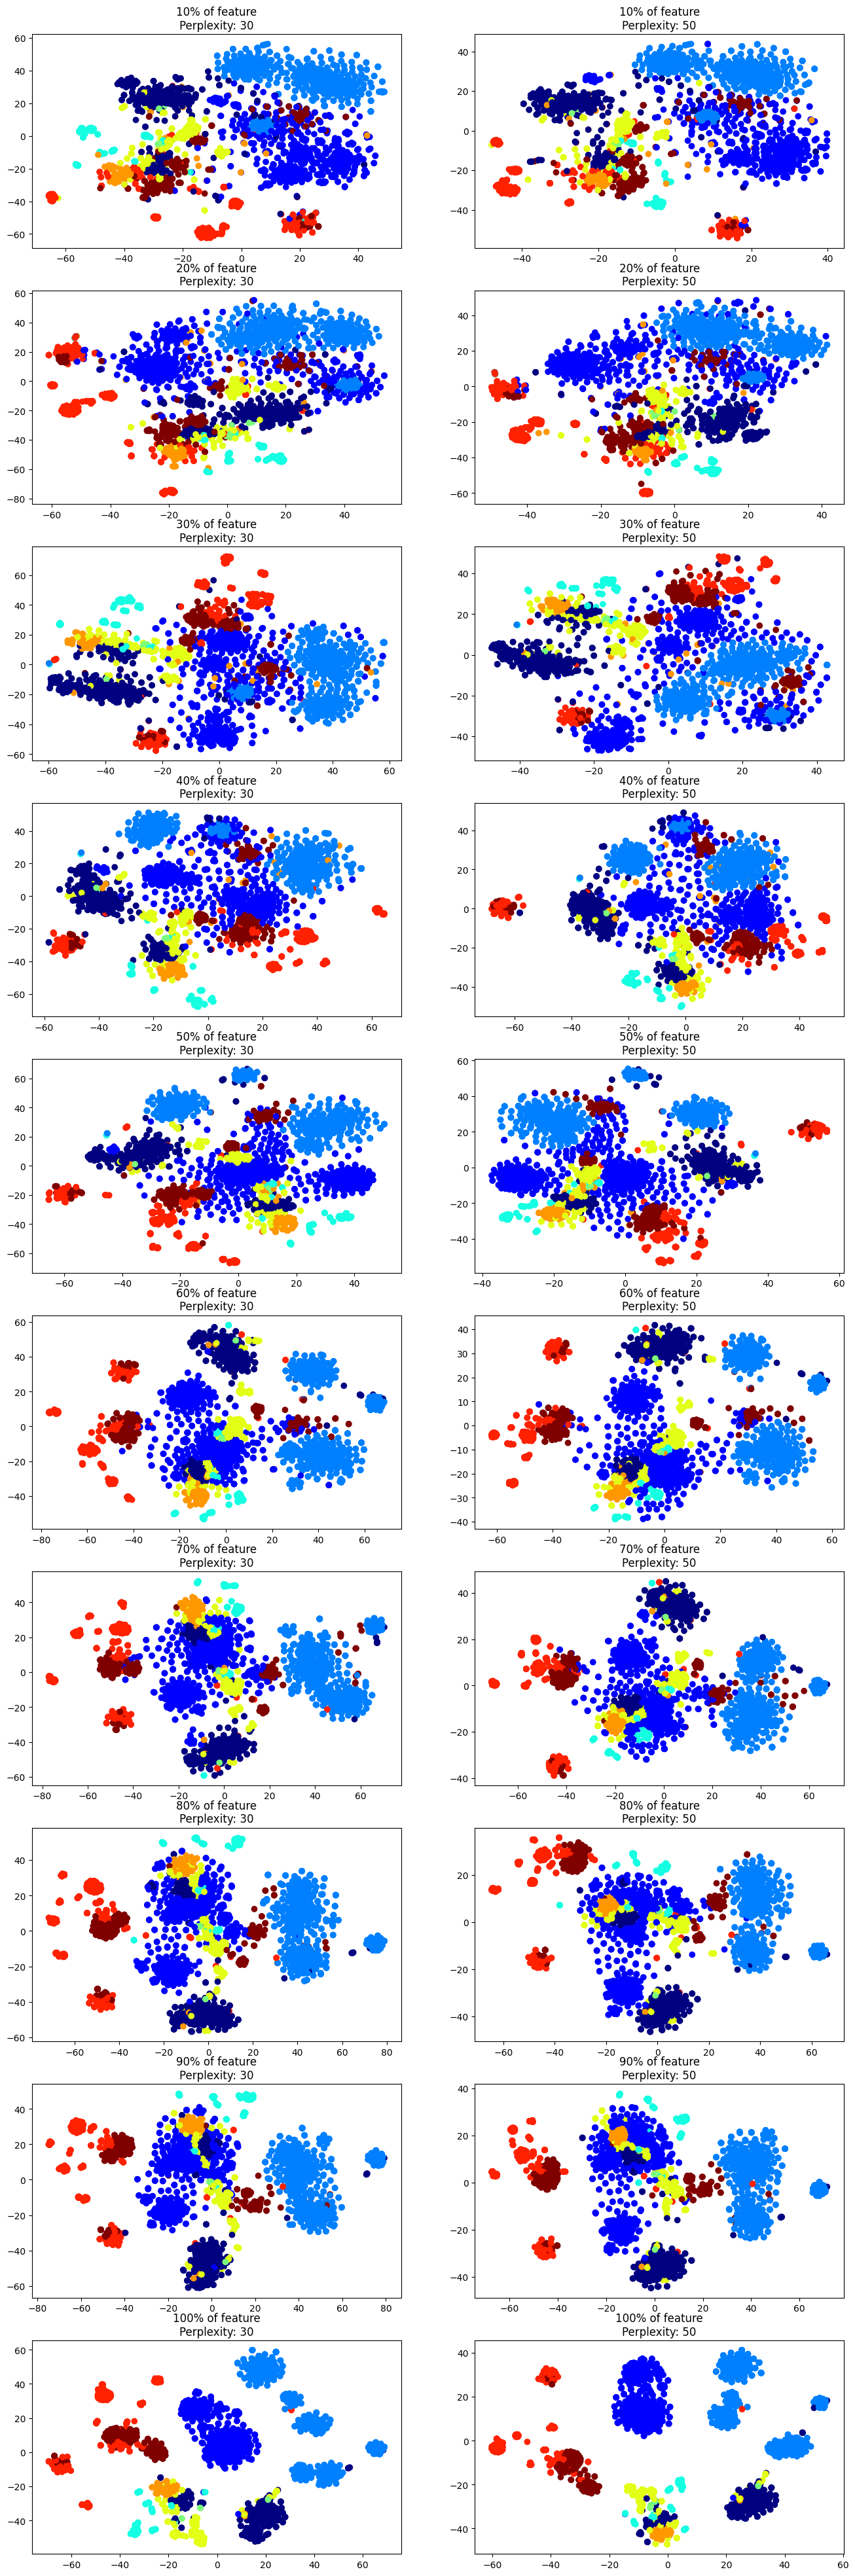

In [11]:
row=0
fig, axs = plt.subplots(10,2,figsize=(16,50))
for i in range(10,101,10):
    col=0
    x_train,_=get_feature_imp_values(X,y,i)
    vis_x_perp_30,vis_yperp_30=tsne_viz(x_train,30)
    vis_x_perp_50,vis_yperp_50=tsne_viz(x_train,50)
    
    axs[row,col].scatter(vis_x_perp_30, vis_yperp_30, c=(y.values), cmap=plt.cm.get_cmap("jet", 9))
    axs[row,col].set_title(f"{i}% of feature\nPerplexity: 30")
    col+=1
    axs[row,col].scatter(vis_x_perp_50, vis_yperp_50, c=(y.values), cmap=plt.cm.get_cmap("jet", 9))
    axs[row,col].set_title(f"{i}% of feature\nPerplexity: 50")
    row+=1
plt.savefig(os.path.join(IMAGE_PATH,"TSNE_PCT_WISE.png"))
plt.show()
    



100%|██████████| 10/10 [07:57<00:00, 47.70s/it]


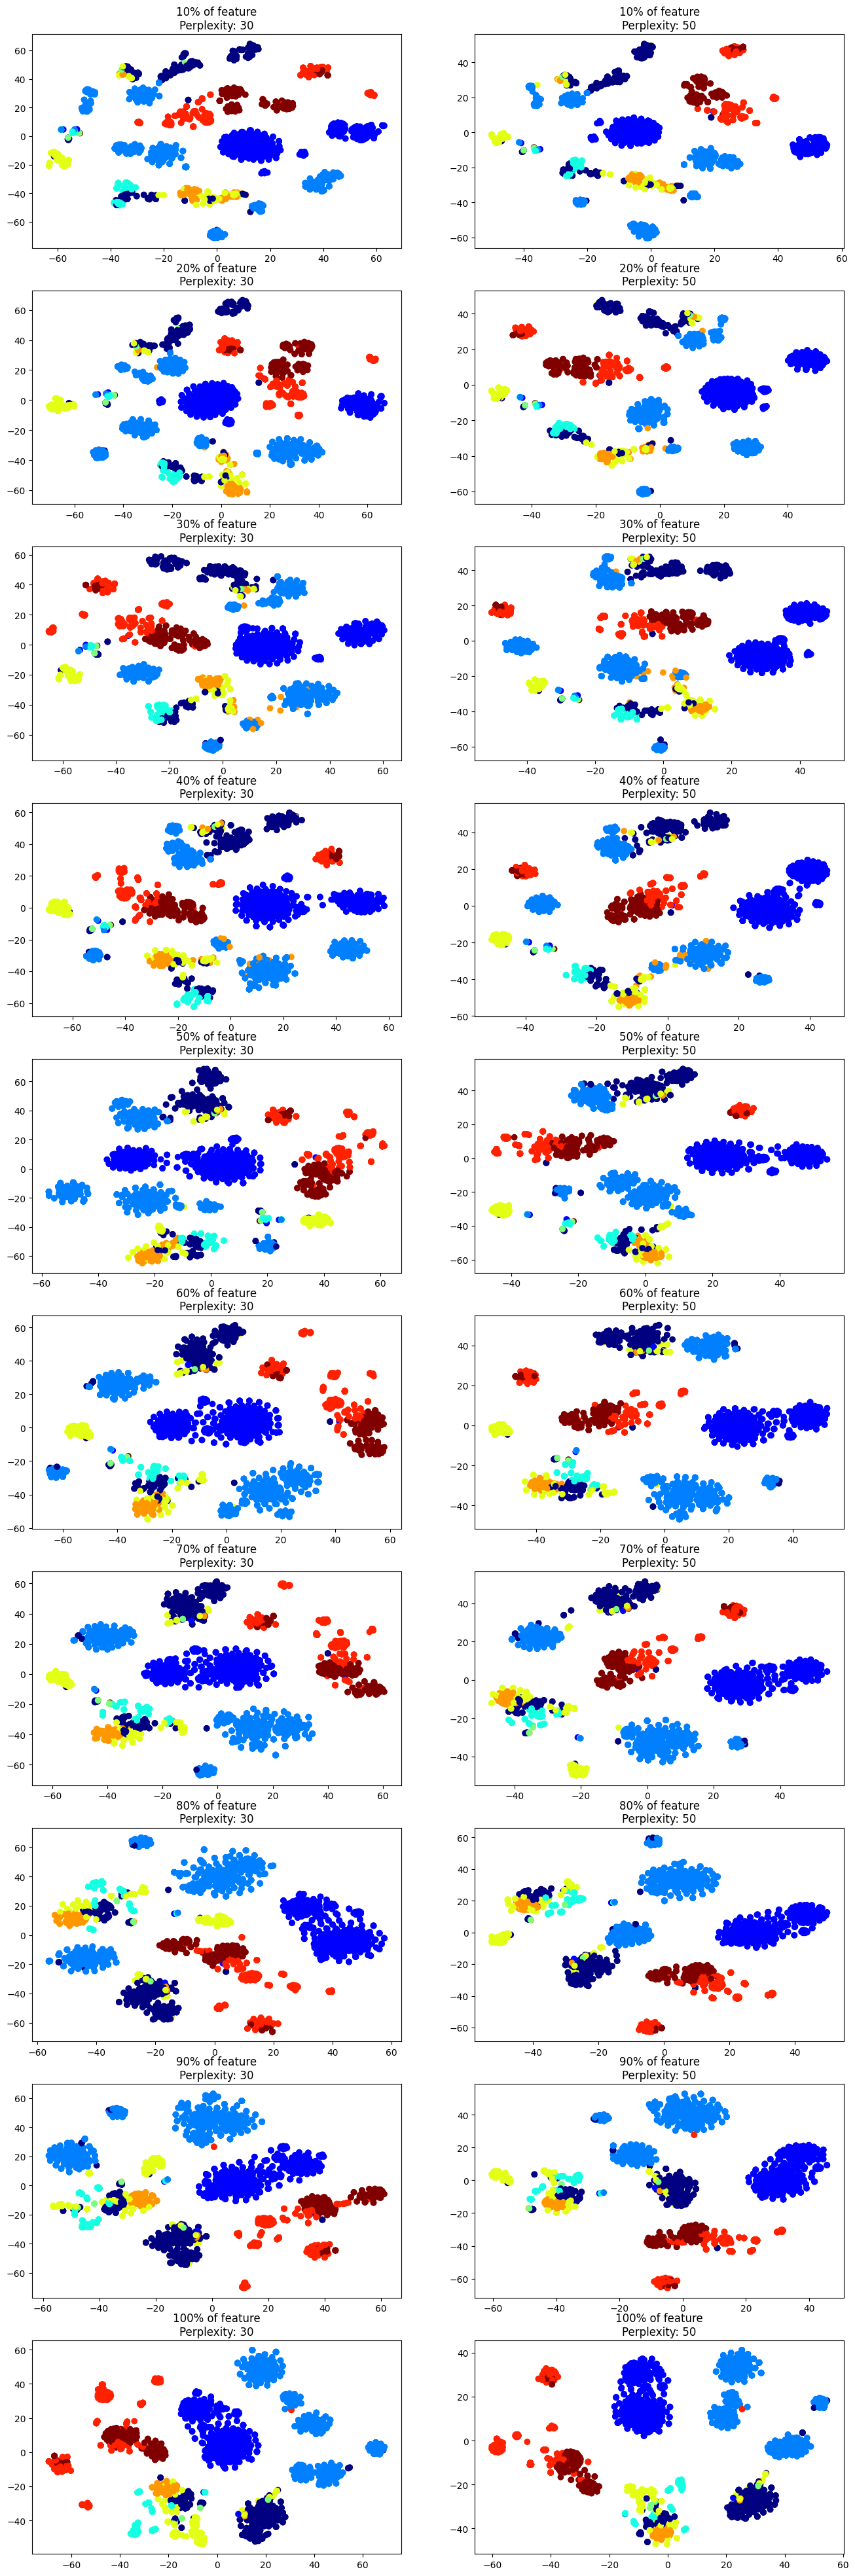

In [12]:
row=0
fig, axs = plt.subplots(10,2,figsize=(16,50))
for i in tqdm(range(10,101,10)):
    col=0
    x_train,feature_dictionary=bigram_feat_importance(X,y,i)
    vis_x_perp_30,vis_yperp_30=tsne_viz(x_train,30)
    vis_x_perp_50,vis_yperp_50=tsne_viz(x_train,50)
    
    axs[row,col].scatter(vis_x_perp_30, vis_yperp_30, c=(y.values), cmap=plt.cm.get_cmap("jet", 9))
    axs[row,col].set_title(f"{i}% of feature\nPerplexity: 30")
    col+=1
    axs[row,col].scatter(vis_x_perp_50, vis_yperp_50, c=(y.values), cmap=plt.cm.get_cmap("jet", 9))
    axs[row,col].set_title(f"{i}% of feature\nPerplexity: 50")
    row+=1
plt.savefig(os.path.join(IMAGE_PATH,"BIGRAM_FEATURE_REDUCED.png"))
plt.show()

In [13]:
%%writefile "F:\\Microsoft Malware Detection\\src\\features\\3.5-mmv-feature-selection.py"

import numpy as np
import pandas as pd
import os
from sklearn.feature_selection import chi2
from get_feature_dictionary import get_feature_dictionary
from scipy.sparse import csr_matrix,load_npz,save_npz
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm


def get_path():
    NOTEBOOK_PATH=os.getcwd()
    PROJECT_ROOT=os.path.dirname(NOTEBOOK_PATH)
    return PROJECT_ROOT
PROJECT_ROOT=get_path()
OUTPUT_PATH_TRAIN=os.path.join(PROJECT_ROOT,"data","processed","train")
OUTPUT_PATH_TEST=os.path.join(PROJECT_ROOT,"data","processed","test")
OUTPUT_PATH_CV=os.path.join(PROJECT_ROOT,"data","processed","cv")
IMAGE_PATH=os.path.join(PROJECT_ROOT,"reports","figures")
feature_dictionary=get_feature_dictionary(PROJECT_ROOT)
feature_dictionary=np.array(feature_dictionary)

FILE_NAME="all_features_normalized.npz"
X=load_npz(os.path.join(OUTPUT_PATH_TRAIN,FILE_NAME))
# X=X.toarray()
y=pd.read_csv(os.path.join(OUTPUT_PATH_TRAIN,'y_train.csv'))
def get_feature_imp_values(X,y,pct):
    feature_importance=chi2(X,y)
    feature_importance=np.flip(np.argsort(feature_importance[1]))
    feat_size=len(feature_importance)
    first_features=int(feat_size*(pct/100))
    # selected_features=feature_dictionary[feature_importance][:first_features]
    x_train=X.toarray()
    x_train=np.take(x_train,feature_importance[:first_features],axis=1)
    return x_train,feature_importance[:first_features]
def tsne_viz(X,perp):
    xtsne=TSNE(perplexity=perp,n_jobs=-1)
    results=xtsne.fit_transform(X)
    vis_x = results[:, 0]
    vis_y = results[:, 1]
    return vis_x,vis_y

def feature_wise_importance(X,y,pct):
    FEAT_FILE_SIZE_POS=np.arange(2)
    FEAT_UNIGRAM_POS=np.arange(2,258)
    FEAT_BIGRAM_POS=np.arange(258,65794)
    FEAT_ASM_IMG_POS=np.arange(65794,66794)
    FEAT_UNIGRAM=X[:,FEAT_UNIGRAM_POS]
    FEAT_UNIGRAM,_=get_feature_imp_values(FEAT_UNIGRAM,y,pct)
    FEAT_BIGRAM=X[:,FEAT_BIGRAM_POS]
    FEAT_BIGRAM,_=get_feature_imp_values(FEAT_BIGRAM,y,pct)
    FEAT_ASM_IMG=X[:,FEAT_ASM_IMG_POS]
    FEAT_ASM_IMG,_=get_feature_imp_values(FEAT_ASM_IMG,y,pct)
    FILE_SIZES=X[:,FEAT_FILE_SIZE_POS].toarray()


    ALL=np.hstack((FILE_SIZES,FEAT_UNIGRAM,FEAT_BIGRAM,FEAT_ASM_IMG))
    return ALL
def bigram_feat_importance(X,y,pct):
    FEAT_FILE_SIZE_POS=np.arange(2)
    FEAT_UNIGRAM_POS=np.arange(2,258)
    FEAT_BIGRAM_POS=np.arange(258,65794)
    FEAT_ASM_IMG_POS=np.arange(65794,66794)
    FEAT_UNIGRAM=X[:,FEAT_UNIGRAM_POS].toarray()
    FEAT_ASM_IMG=X[:,FEAT_ASM_IMG_POS].toarray()
    FILE_SIZES=X[:,FEAT_FILE_SIZE_POS].toarray()

    FEAT_BIGRAM=X[:,FEAT_BIGRAM_POS]
    FEAT_BIGRAM,FEAT_BIGRAM_POS=get_feature_imp_values(FEAT_BIGRAM,y,pct)   
    FEAT_BIGRAM_POS+=258

    # feature_dictionary=get_feature_dictionary(PROJECT_ROOT)
    # feature_dictionary=np.array(feature_dictionary)
    reduced_feat_dict=np.hstack((FEAT_FILE_SIZE_POS,FEAT_UNIGRAM_POS,FEAT_BIGRAM_POS,FEAT_ASM_IMG_POS))
    # feature_dictionary=np.take(feature_dictionary,reduced_feat_dict)
    ALL=np.hstack((FILE_SIZES,FEAT_UNIGRAM,FEAT_BIGRAM,FEAT_ASM_IMG))
    return ALL,reduced_feat_dict

row=0
fig, axs = plt.subplots(10,2,figsize=(16,50))
for i in tqdm(range(10,101,10)):
    col=0
    x_train=feature_wise_importance(X,y,i)
    vis_x_perp_30,vis_yperp_30=tsne_viz(x_train,30)
    vis_x_perp_50,vis_yperp_50=tsne_viz(x_train,50)
    
    axs[row,col].scatter(vis_x_perp_30, vis_yperp_30, c=(y.values), cmap=plt.cm.get_cmap("jet", 9))
    axs[row,col].set_title(f"{i}% of feature\nPerplexity: 30")
    col+=1
    axs[row,col].scatter(vis_x_perp_50, vis_yperp_50, c=(y.values), cmap=plt.cm.get_cmap("jet", 9))
    axs[row,col].set_title(f"{i}% of feature\nPerplexity: 50")
    row+=1
plt.savefig(os.path.join(IMAGE_PATH,"TSNE_FEATURE_WISE.png"))
plt.show()
row=0
fig, axs = plt.subplots(10,2,figsize=(16,50))
for i in range(10,101,10):
    col=0
    x_train,_=get_feature_imp_values(X,y,i)
    vis_x_perp_30,vis_yperp_30=tsne_viz(x_train,30)
    vis_x_perp_50,vis_yperp_50=tsne_viz(x_train,50)
    
    axs[row,col].scatter(vis_x_perp_30, vis_yperp_30, c=(y.values), cmap=plt.cm.get_cmap("jet", 9))
    axs[row,col].set_title(f"{i}% of feature\nPerplexity: 30")
    col+=1
    axs[row,col].scatter(vis_x_perp_50, vis_yperp_50, c=(y.values), cmap=plt.cm.get_cmap("jet", 9))
    axs[row,col].set_title(f"{i}% of feature\nPerplexity: 50")
    row+=1
plt.savefig(os.path.join(IMAGE_PATH,"TSNE_PCT_WISE.png"))
plt.show()
    


row=0
fig, axs = plt.subplots(10,2,figsize=(16,50))
for i in tqdm(range(10,101,10)):
    col=0
    x_train,feature_dictionary=bigram_feat_importance(X,y,i)
    vis_x_perp_30,vis_yperp_30=tsne_viz(x_train,30)
    vis_x_perp_50,vis_yperp_50=tsne_viz(x_train,50)
    
    axs[row,col].scatter(vis_x_perp_30, vis_yperp_30, c=(y.values), cmap=plt.cm.get_cmap("jet", 9))
    axs[row,col].set_title(f"{i}% of feature\nPerplexity: 30")
    col+=1
    axs[row,col].scatter(vis_x_perp_50, vis_yperp_50, c=(y.values), cmap=plt.cm.get_cmap("jet", 9))
    axs[row,col].set_title(f"{i}% of feature\nPerplexity: 50")
    row+=1
plt.savefig(os.path.join(IMAGE_PATH,"BIGRAM_FEATURE_REDUCED.png"))
plt.show()

Overwriting F:\\Microsoft Malware Detection\\src\\features\\3.5-mmv-feature-selection.py


In [14]:
%%writefile "feature_selection.py"

import numpy as np
import pandas as pd
import os
from sklearn.feature_selection import chi2
from get_feature_dictionary import get_feature_dictionary
from scipy.sparse import csr_matrix,load_npz,save_npz
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm



def get_path():
    NOTEBOOK_PATH=os.getcwd()
    PROJECT_ROOT=os.path.dirname(NOTEBOOK_PATH)
    return PROJECT_ROOT
PROJECT_ROOT=get_path()
OUTPUT_PATH_TRAIN=os.path.join(PROJECT_ROOT,"data","processed","train")
OUTPUT_PATH_TEST=os.path.join(PROJECT_ROOT,"data","processed","test")
OUTPUT_PATH_CV=os.path.join(PROJECT_ROOT,"data","processed","cv")
IMAGE_PATH=os.path.join(PROJECT_ROOT,"reports","figures")
feature_dictionary=get_feature_dictionary(PROJECT_ROOT)
feature_dictionary=np.array(feature_dictionary)

FILE_NAME="all_features_normalized.npz"
X=load_npz(os.path.join(OUTPUT_PATH_TRAIN,FILE_NAME))
# X=X.toarray()
y=pd.read_csv(os.path.join(OUTPUT_PATH_TRAIN,'y_train.csv'))
def get_feature_imp_values(X,y,pct):
    feature_importance=chi2(X,y)
    feature_importance=np.flip(np.argsort(feature_importance[1]))
    feat_size=len(feature_importance)
    first_features=int(feat_size*(pct/100))
    # selected_features=feature_dictionary[feature_importance][:first_features]
    x_train=X.toarray()
    x_train=np.take(x_train,feature_importance[:first_features],axis=1)
    return x_train,feature_importance[:first_features]
def tsne_viz(X,perp):
    xtsne=TSNE(perplexity=perp,n_jobs=-1)
    results=xtsne.fit_transform(X)
    vis_x = results[:, 0]
    vis_y = results[:, 1]
    return vis_x,vis_y

def feature_wise_importance(X,y,pct):
    FEAT_FILE_SIZE_POS=np.arange(2)
    FEAT_UNIGRAM_POS=np.arange(2,258)
    FEAT_BIGRAM_POS=np.arange(258,65794)
    FEAT_ASM_IMG_POS=np.arange(65794,66794)
    FEAT_UNIGRAM=X[:,FEAT_UNIGRAM_POS]
    FEAT_UNIGRAM,_=get_feature_imp_values(FEAT_UNIGRAM,y,pct)
    FEAT_BIGRAM=X[:,FEAT_BIGRAM_POS]
    FEAT_BIGRAM,_=get_feature_imp_values(FEAT_BIGRAM,y,pct)
    FEAT_ASM_IMG=X[:,FEAT_ASM_IMG_POS]
    FEAT_ASM_IMG,_=get_feature_imp_values(FEAT_ASM_IMG,y,pct)
    FILE_SIZES=X[:,FEAT_FILE_SIZE_POS].toarray()


    ALL=np.hstack((FILE_SIZES,FEAT_UNIGRAM,FEAT_BIGRAM,FEAT_ASM_IMG))
    return ALL
def bigram_feat_importance(X,y,pct):
    FEAT_FILE_SIZE_POS=np.arange(2)
    FEAT_UNIGRAM_POS=np.arange(2,258)
    FEAT_BIGRAM_POS=np.arange(258,65794)
    FEAT_ASM_IMG_POS=np.arange(65794,66794)
    FEAT_UNIGRAM=X[:,FEAT_UNIGRAM_POS].toarray()
    FEAT_ASM_IMG=X[:,FEAT_ASM_IMG_POS].toarray()
    FILE_SIZES=X[:,FEAT_FILE_SIZE_POS].toarray()

    FEAT_BIGRAM=X[:,FEAT_BIGRAM_POS]
    FEAT_BIGRAM,FEAT_BIGRAM_POS=get_feature_imp_values(FEAT_BIGRAM,y,pct)   
    FEAT_BIGRAM_POS+=258

    # feature_dictionary=get_feature_dictionary(PROJECT_ROOT)
    # feature_dictionary=np.array(feature_dictionary)
    reduced_feat_dict=np.hstack((FEAT_FILE_SIZE_POS,FEAT_UNIGRAM_POS,FEAT_BIGRAM_POS,FEAT_ASM_IMG_POS))
    # feature_dictionary=np.take(feature_dictionary,reduced_feat_dict)
    ALL=np.hstack((FILE_SIZES,FEAT_UNIGRAM,FEAT_BIGRAM,FEAT_ASM_IMG))
    return ALL,reduced_feat_dict

Overwriting feature_selection.py
